### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data
air = pd.read_csv('data/AirPassengers.csv')

### Sunspots

In [3]:
sunspots.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [4]:
# convert dates into a timestamp object
pd.to_datetime(sunspots.loc[0, 'YEAR'])

Timestamp('1970-01-01 00:00:00.000001700')

In [5]:
# set timestamp as index
sunspots = sunspots.set_index(pd.to_datetime(sunspots['YEAR']))

In [6]:
# drop the index column only one column for creating a Time Series
sunspots.drop(columns=['YEAR'], inplace=True)

In [7]:
# Created Time Series
sunspots

,SUNACTIVITY
YEAR,
1970-01-01 00:00:00.000001700,5.0
1970-01-01 00:00:00.000001701,11.0
1970-01-01 00:00:00.000001702,16.0
1970-01-01 00:00:00.000001703,23.0
1970-01-01 00:00:00.000001704,36.0
...,...
1970-01-01 00:00:00.000002004,40.4
1970-01-01 00:00:00.000002005,29.8
1970-01-01 00:00:00.000002006,15.2


<Axes: xlabel='YEAR'>

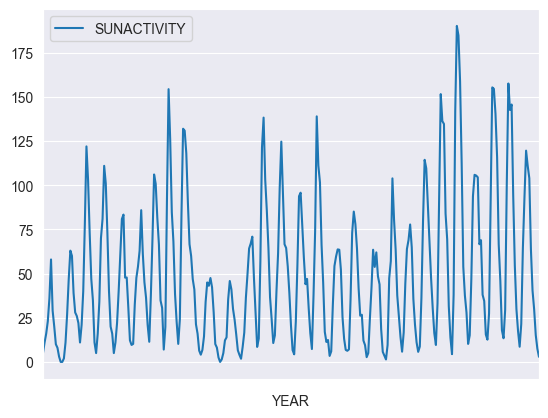

In [8]:
sunspots.plot()

The sunspot data shows no obvious increasing and decreasing trend over more than two and a half centuries but it seems that the peaks is pretty regular which shows indication of seasonality. Now let us try to decompose the time series.

The trend, seasonality, and remainder all still show repeated patterns which mean that there is still a seasonality we have not captured. Let’s make the frequency to be 11 years as suggested by literature.

The sunspots are, after all results of the sun’s magnetic activity. This 22 year cycle will be added to the 11 year cycle.

- Additive Decomposition

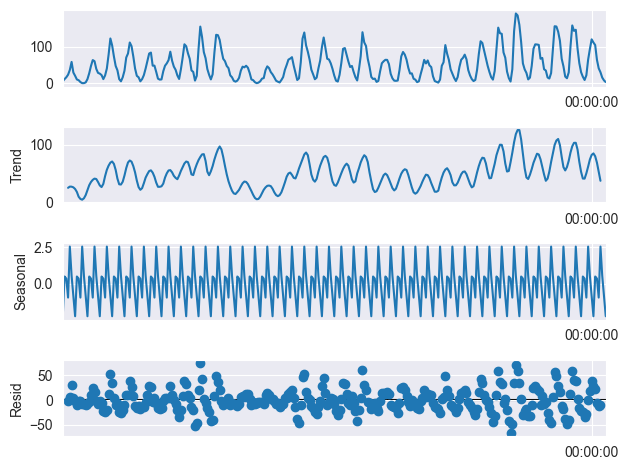

In [9]:
result = seasonal_decompose(sunspots, model='additive', period=7)
result.plot()
plt.show()

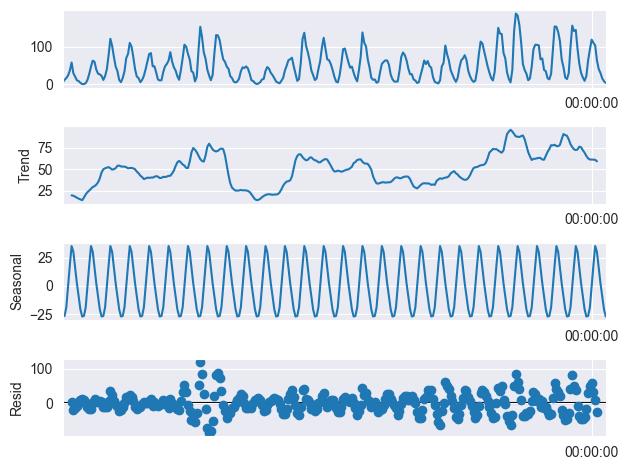

In [10]:
result = seasonal_decompose(sunspots, model='additive', period=11)
result.plot()
plt.show()

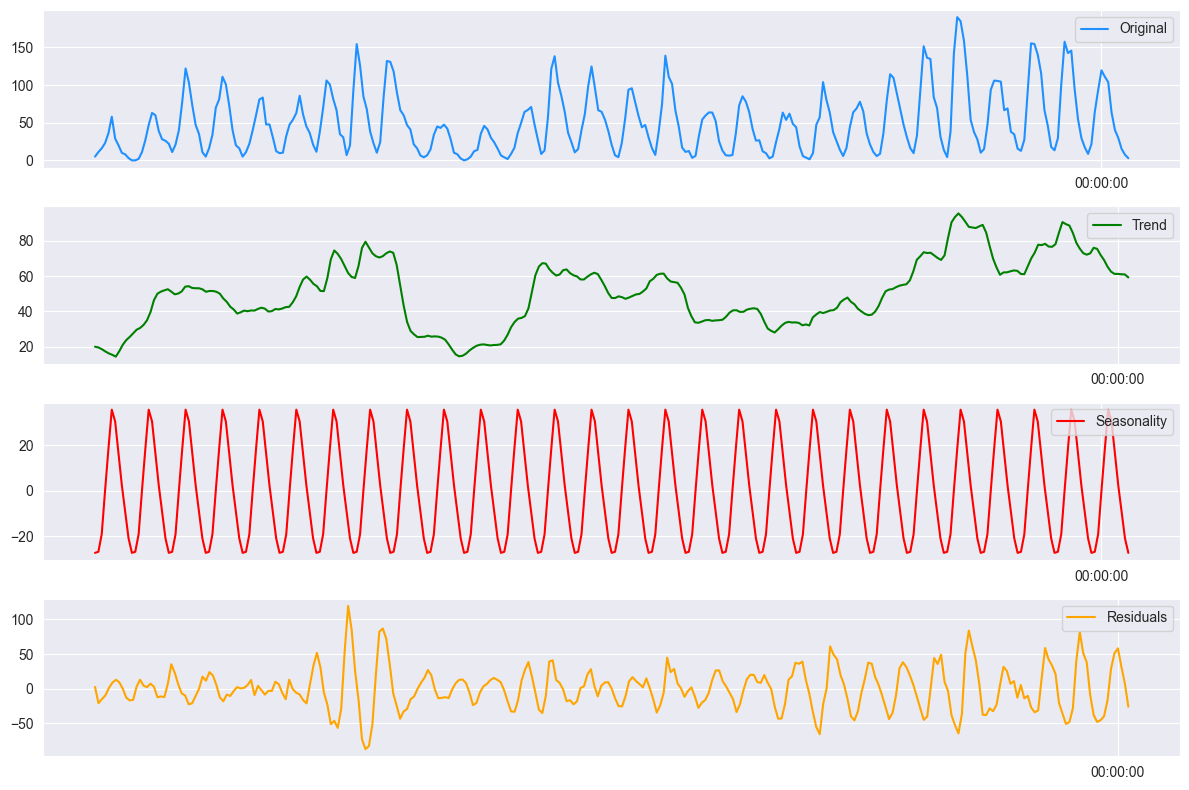

In [11]:
# get the trend, seasonality and noise 
trend = result.trend
seasonal = result.seasonal
residual = result.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(sunspots, label='Original', color="dodgerblue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="green")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="orange")
plt.legend(loc='best')
plt.tight_layout()

### Air

In [12]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [13]:
# convert dates into a timestamp object
pd.to_datetime(air.loc[0, 'Month'])

Timestamp('1949-01-01 00:00:00')

In [14]:
# set timestamp as index
air = air.set_index(pd.to_datetime(air['Month']))

In [15]:
# drop the index column only one column for creating a Time Series
air.drop(columns=['Month'], inplace=True)

In [16]:
air.rename(columns={'#Passengers':'Passengers'}, inplace=True)

<Axes: xlabel='Month'>

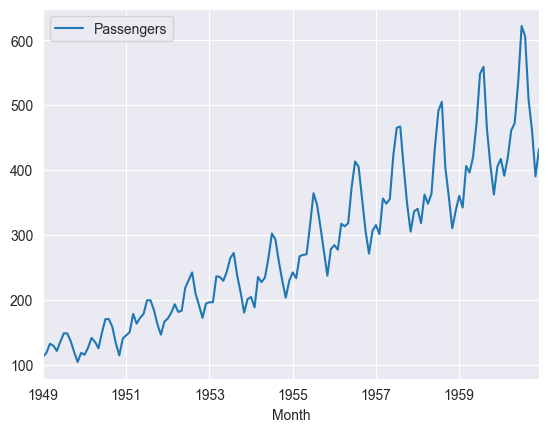

In [17]:
air.plot()

if you look at the below time series chart you can see it has an upward trend but also has some seasonality to it. It would be helpful if we can decompose this time series to its constituents.

- Additive Decomposition

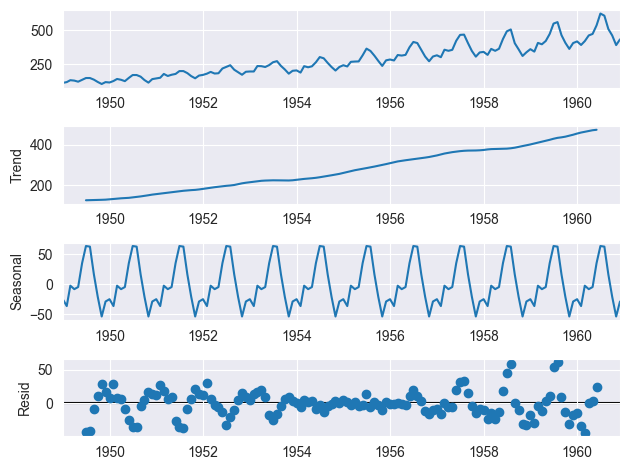

In [18]:
result_air = seasonal_decompose(air, model='additive')
result_air.plot()
plt.show()

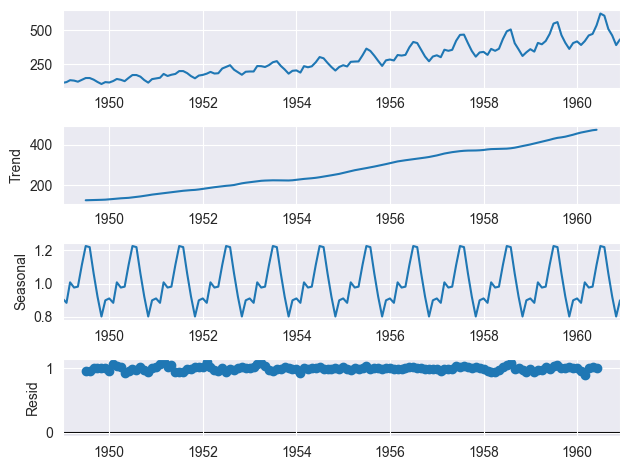

In [19]:
result_air = seasonal_decompose(air, model='multiplicative')
result_air.plot()
plt.show()

In [20]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

def plotseasonal1(res1, axes ):
    res1.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res1.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res1.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res1.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(result, axes[:,0])
plotseasonal1(result_air, axes[:,1])


plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 2.61 EiB for an array with shape (376012800000000000,) and data type int64

Error in callback <function _draw_all_if_interactive at 0x0000025B6E10A830> (for post_execute):


MemoryError: Unable to allocate 2.61 EiB for an array with shape (376012800000000000,) and data type int64

MemoryError: Unable to allocate 2.61 EiB for an array with shape (376012800000000000,) and data type int64

<Figure size 1200x500 with 8 Axes>

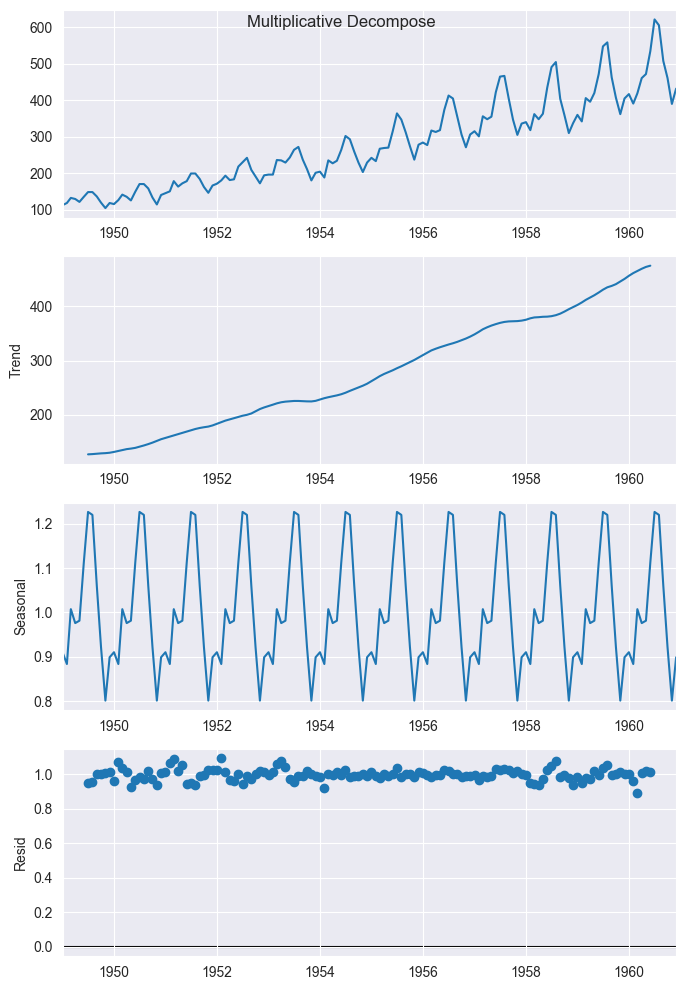

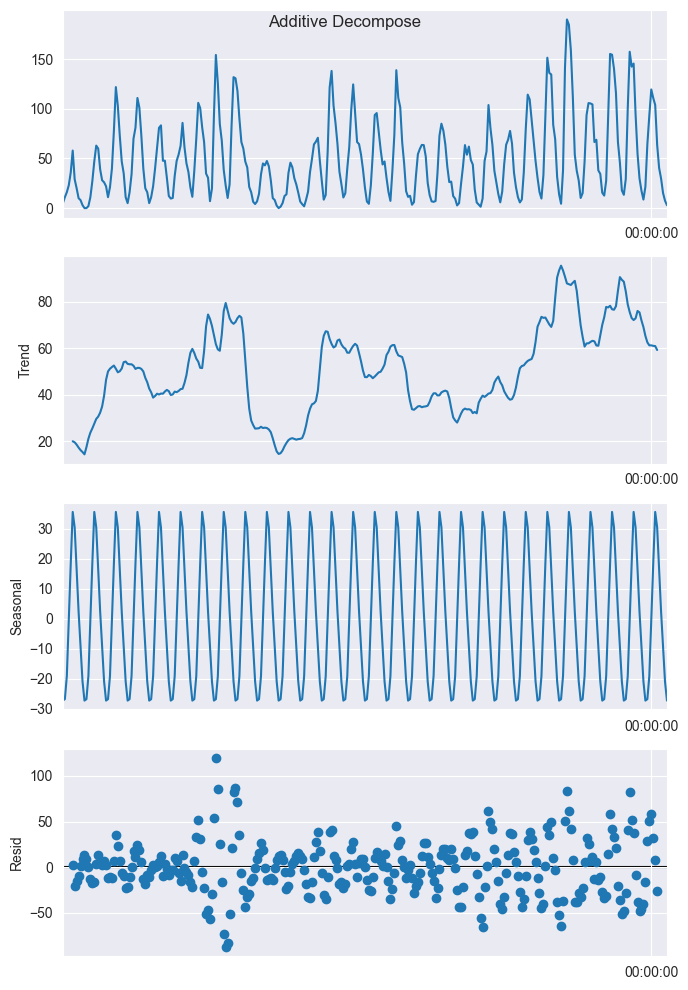

In [21]:
# Plot
plt.rcParams.update({'figure.figsize': (7,10)})
result_air.plot().suptitle('Multiplicative Decompose', fontsize=12)
result.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()